# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
from math import factorial
import matplotlib.pyplot as plt
import seaborn as sns


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv') # leemos el archivo "calls"
internet = pd.read_csv('/datasets/megaline_internet.csv') # leemos el archivo "products"
messages = pd.read_csv('/datasets/megaline_messages.csv') # leemos el archivo "aisles"
plans = pd.read_csv('/datasets/megaline_plans.csv') # leemos el archivo "departments"
users = pd.read_csv('/datasets/megaline_users.csv') # leemos el archivo "order_products"

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

### Calls

In [3]:
# Calls
print(calls.shape)
print(" ")
print(calls.head())
print(" ")
print(calls.info())
print(" ")
duplicateCalls = calls.duplicated().sum() # Determinamos cuántas filas están duplicadas
print("Número de filas duplicadas 'Calls': ", duplicateCalls)

(137735, 4)
 
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
 
Número de filas duplicadas 'Calls':  0


### Internet

In [4]:
# Internet
print(internet.shape)
print(" ")
print(internet.head())
print(" ")
print(internet.info())
print(" ")
duplicateInternet = internet.duplicated().sum() # Determinamos cuántas filas están duplicadas
print("Número de filas duplicadas 'Internet': ", duplicateInternet)

(104825, 4)
 
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
 
Número de filas duplicadas 'Internet':  0


### Messages

In [5]:
# Messages
print(messages.shape)
print(" ")
print(messages.head())
print(" ")
print(messages.info())
duplicateMessages = messages.duplicated().sum() # Determinamos cuántas filas están duplicadas
print("Número de filas duplicadas 'Messages': ", duplicateMessages)

(76051, 3)
 
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
Número de filas duplicadas 'Messages':  0


### Plans

In [6]:
# Plans
print(plans.shape)
print(" ")
print(plans.head())
print(" ")
print(plans.info())
duplicatePlans = plans.duplicated().sum() # Determinamos cuántas filas están duplicadas
print("Número de filas duplicadas 'Plans': ", duplicatePlans)

(2, 8)
 
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float

### Users

In [7]:
# Users
print(users.shape)
print(" ")
print(users.head())
print(" ")
print(users.info())
duplicateUsers = users.duplicated().sum() # Determinamos cuántas filas están duplicadas
print("Número de filas duplicadas 'Users': ", duplicateUsers)

(500, 8)
 
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500

## Tarifas

In [8]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [9]:
# Imprime una muestra de los datos para las tarifas
print(plans.head(5))

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


En forma general lo que veo es que la tabla de "Plans" contiene la descripción de los dos tipos de planes que ofrece Megaline. A la hora de llamar a "info()", me pude dar cuenta que los tipos de datos están correctos para todas las columnas excepto para la última, que debería ser tipo de datos "string" y no "object". Por otro lado, no logro observar ningun valor ausente o duplicado derivado del hecho de que solo se muestran ambas tarifas con sus respectivas descripciones. Para poder arreglar lo del tipo de dato erroneo podemos usar la función "as type", como se muestra a continuación. 

### Corregir datos

In [10]:
# Para la tabla de "plans", se tiene que corregir el tipo de dato de la columna "plan_name".
plans['plan_name'] = plans['plan_name'].astype('string')

In [11]:
# El cambio se efectuó con éxito
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      string 
dtypes: float64(2), int64(5), string(1)
memory usage: 256.0 bytes


### Enriquecer los datos

In [12]:
# Considero que no hay factores adicionaels que agregar a los datos. 
# Siento que con la información y desglos que tenemos es suficiente para poder empezar el análisis estadístico

## Usuarios/as

In [13]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [14]:
# Imprime una muestra de datos para usuarios
print(users.head(5))

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


En forma general lo que veo es que la tabla de "Users" contiene la información pesonal de los clientes de Megaline. A la hora de llamar a "info()", me pude dar cuenta que los tipos de datos están incorrectos para la mayor parte de las columnas. Por otro lado, logré observar valores ausentes en la columna "churn_date". Para poder arreglar lo del tipo de dato erroneo podemos usar la función "as type" o pd.to_datetime, como se muestra a continuación. Y para lo del dato austente, podemos usar la función "fill_na()"

### Corregir los datos

In [15]:
# Para la tabla de "users", se tiene que corregir el tipo de dato de la columna "user_id", "first_name", "last_name", "city", "reg_date", "plan" y de "churn_date".
users['user_id'] = users['user_id'].astype('string')
users['first_name'] = users['first_name'].astype('string')
users['last_name'] = users['last_name'].astype('string')
users['city'] = users['city'].astype('string')
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['plan'] = users['plan'].astype('string')

In [16]:
# Ademas, sabemos que la columna "churn_date" se refiere a la fecha en la que el usuario dejó de usar el servicio
# Si está vacía, la tarifa se estaba usando cuando fue extraída esta base de datos.
# Para no hacer análisis con datos vacíos, vamos a reemplazar los datos vacíos por 0

users['churn_date'] = users['churn_date'].fillna(0) # Se reemplazaron los datos vacíos por el "0"
print(users.head())




  user_id first_name  last_name  age                                   city  \
0    1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1    1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2    1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3    1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4    1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  
0 2018-12-24  ultimate          0  
1 2018-08-13      surf          0  
2 2018-10-21      surf          0  
3 2018-01-28      surf          0  
4 2018-05-23      surf          0  


In [17]:
users['churn_date'] = pd.to_datetime(users['churn_date']) # Se cambió el tipo de dato a "datetime"

In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    string        
 1   first_name  500 non-null    string        
 2   last_name   500 non-null    string        
 3   age         500 non-null    int64         
 4   city        500 non-null    string        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    string        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), string(5)
memory usage: 31.4 KB


### Enriquecer los datos

In [19]:
# Considero que no hay factores adicionaels que agregar a los datos. 
# Siento que con la información y desglos que tenemos es suficiente para poder empezar el análisis estadístico

## Llamadas

In [20]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [21]:
# Imprime una muestra de datos para las llamadas
print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


En forma general lo que veo es que la tabla de "Calls" contiene la información de las llamadas que hicieron los clientes de Megaline. A la hora de llamar a "info()", me pude dar cuenta que los tipos de datos están incorrectos para la columna "call_date" y "id". Por otro lado, no logro observar ningun valor ausente o duplicado. Para poder arreglar lo del tipo de dato erroneo podemos usar la función "as type" o pd.to_datetime, como se muestra a continuación.

### Corregir los datos

In [22]:
# Para la tabla de "calls", se tiene que corregir el tipo de dato de la columna "id" y de "call_date".
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['id'] = calls['id'].astype('string')

In [23]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  string        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), string(1)
memory usage: 4.2 MB


### Enriquecer los datos

In [24]:
# Considero que no hay factores adicionaels que agregar a los datos. 
# Siento que con la información y desglos que tenemos es suficiente para poder empezar el análisis estadístico

## Mensajes

In [25]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [26]:
# Imprime una muestra de datos para los mensajes
print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


En forma general lo que veo es que la tabla de "Messages" contiene la información de los mensajes que hicieron los clientes de Megaline. A la hora de llamar a "info()", me pude dar cuenta que los tipos de datos están incorrectos para la columna "message_date" y "id". Por otro lado, no logro observar ningun valor ausente o duplicado. Para poder arreglar lo del tipo de dato erroneo podemos usar la función "as type" o pd.to_datetime, como se muestra a continuación.

### Corregir los datos

In [27]:
# Para la tabla de "messages", se tiene que corregir el tipo de dato de la columna "id" y de "message_date".
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['id'] = messages['id'].astype('string')


In [28]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  string        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), string(1)
memory usage: 1.7 MB


### Enriquecer los datos

In [29]:
# Considero que no hay factores adicionaels que agregar a los datos. 
# Siento que con la información y desglos que tenemos es suficiente para poder empezar el análisis estadístico

## Internet

In [30]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [31]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


En forma general lo que veo es que la tabla de "Messages" contiene la información los mb usados por los clientes de Megaline. A la hora de llamar a "info()", me pude dar cuenta que los tipos de datos están incorrectos para la columna "session_date" y "id". Por otro lado, no logro observar ningun valor ausente o duplicado. Para poder arreglar lo del tipo de dato erroneo podemos usar la función "as type" o pd.to_datetime, como se muestra a continuación.

### Corregir los datos

In [32]:
# Para la tabla de "internet", se tiene que corregir el tipo de dato de la columna "id" y de "session_date".
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['id'] = internet['id'].astype('string')

In [33]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  string        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), string(1)
memory usage: 3.2 MB


### Enriquecer los datos

In [34]:
# Considero que no hay factores adicionaels que agregar a los datos. 
# Siento que con la información y desglos que tenemos es suficiente para poder empezar el análisis estadístico

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [35]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans.info())
print(" ")
print(plans.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      string 
dtypes: float64(2), int64(5), string(1)
memory usage: 256.0 bytes
None
 
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10     

### Sabemos que existen dos tipos de plan "surf" y "ultimate". Cada uno de estos tiene diferentes características, por ejemplo el plan "surf" te incluye 50 mensajes y 500 minutos, mientras que el plan "ultimate" te incluye 1,000 mensajes y 3,000 minutos.

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [36]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['call_date'] = calls['call_date'].dt.month
# Calcular el número de llamadas por usuario y mes
calls_per_month = calls.groupby(['user_id', 'call_date']).size().reset_index(name='num_calls')
calls_per_month = calls_per_month.rename(columns={'call_date': 'month'})

# Imprimir el resultado final
print(calls_per_month)

      user_id  month  num_calls
0        1000     12         16
1        1001      8         27
2        1001      9         49
3        1001     10         65
4        1001     11         64
...       ...    ...        ...
2253     1498     12         39
2254     1499      9         41
2255     1499     10         53
2256     1499     11         45
2257     1499     12         65

[2258 rows x 3 columns]


In [37]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_month = calls.groupby(['user_id', 'call_date'])['duration'].sum().reset_index(name='minutes')
minutes_per_month = minutes_per_month.rename(columns={'call_date': 'month'})

# Imprimir el resultado final
print(minutes_per_month)

      user_id  month  minutes
0        1000     12   116.83
1        1001      8   171.14
2        1001      9   297.69
3        1001     10   374.11
4        1001     11   404.59
...       ...    ...      ...
2253     1498     12   324.77
2254     1499      9   330.37
2255     1499     10   363.28
2256     1499     11   288.56
2257     1499     12   468.10

[2258 rows x 3 columns]


In [38]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['message_date'] = messages['message_date'].dt.month
messages_per_month = messages.groupby(['user_id', 'message_date']).size().reset_index(name='num_messages')
messages_per_month = messages_per_month.rename(columns={'message_date': 'month'})

# Imprimir el resultado final
print(messages_per_month)

      user_id  month  num_messages
0        1000     12            11
1        1001      8            30
2        1001      9            44
3        1001     10            53
4        1001     11            36
...       ...    ...           ...
1801     1496      9            21
1802     1496     10            18
1803     1496     11            13
1804     1496     12            11
1805     1497     12            50

[1806 rows x 3 columns]


In [39]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['session_date'] = internet['session_date'].dt.month

# Calcular el volumen de tráfico de Internet usado por cada usuario al mes
internet_usage_per_month = internet.groupby(['user_id', 'session_date'])['mb_used'].sum().reset_index()
internet_usage_per_month = internet_usage_per_month.rename(columns={'session_date': 'month'})

# Imprimir el resultado final
print(internet_usage_per_month)

      user_id  month   mb_used
0        1000     12   1901.47
1        1001      8   6919.15
2        1001      9  13314.82
3        1001     10  22330.49
4        1001     11  18504.30
...       ...    ...       ...
2272     1498     12  23137.69
2273     1499      9  12984.76
2274     1499     10  19492.43
2275     1499     11  16813.83
2276     1499     12  22059.21

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [40]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Mantener solo las columnas relevantes

# 1. Fusionar llamadas y minutos
megaline = pd.merge(calls_per_month[['user_id', 'month', 'num_calls']],
                     minutes_per_month[['user_id', 'month', 'minutes']],
                     on=['user_id', 'month'], how='outer')

# 2. Fusionar con mensajes
megaline = pd.merge(megaline,
                     messages_per_month[['user_id', 'month', 'num_messages']],
                     on=['user_id', 'month'], how='outer')

# 3. Fusionar con uso de internet
megaline = pd.merge(megaline,
                     internet_usage_per_month[['user_id', 'month', 'mb_used']],
                     on=['user_id', 'month'], how='outer')

# Mostrar el resultado final
print(megaline)

      user_id  month  num_calls  minutes  num_messages   mb_used
0        1000     12       16.0   116.83          11.0   1901.47
1        1001      8       27.0   171.14          30.0   6919.15
2        1001      9       49.0   297.69          44.0  13314.82
3        1001     10       65.0   374.11          53.0  22330.49
4        1001     11       64.0   404.59          36.0  18504.30
...       ...    ...        ...      ...           ...       ...
2288     1349     12        NaN      NaN          61.0  13039.91
2289     1361      5        NaN      NaN           2.0   1519.69
2290     1482     10        NaN      NaN           2.0       NaN
2291     1108     12        NaN      NaN           NaN    233.17
2292     1311      6        NaN      NaN           NaN   1498.83

[2293 rows x 6 columns]


In [41]:
megaline['user_id'] = megaline['user_id'].astype('string')

In [42]:
# Añade la información de la tarifa

# Seleccionar solo las columnas necesarias de df_tarifas (user_id y plan)
df_users_filtered = users[['user_id', 'plan']]

# Fusionar la información de la tarifa (plan) con la tabla de datos unida
megaline_final = pd.merge(megaline, df_users_filtered, on='user_id', how='left')

# Asegúrate de que las columnas plan y plan_name están en el mismo formato (ej. ambos en string)
megaline_final['plan'] = megaline_final['plan'].astype('string')
plans['plan_name'] = plans['plan_name'].astype('string')

# Fusionar la información de la nueva tabla con df_final
megaline_final = pd.merge(megaline_final, plans, left_on='plan', right_on='plan_name', how='left')

megaline_final = megaline_final.drop('plan_name', axis=1) # eliminamos la columna de "plan_name"

# Mostrar el resultado final
print(megaline_final)

     user_id  month  num_calls  minutes  num_messages   mb_used      plan  \
0       1000     12       16.0   116.83          11.0   1901.47  ultimate   
1       1001      8       27.0   171.14          30.0   6919.15      surf   
2       1001      9       49.0   297.69          44.0  13314.82      surf   
3       1001     10       65.0   374.11          53.0  22330.49      surf   
4       1001     11       64.0   404.59          36.0  18504.30      surf   
...      ...    ...        ...      ...           ...       ...       ...   
2288    1349     12        NaN      NaN          61.0  13039.91      surf   
2289    1361      5        NaN      NaN           2.0   1519.69      surf   
2290    1482     10        NaN      NaN           2.0       NaN  ultimate   
2291    1108     12        NaN      NaN           NaN    233.17  ultimate   
2292    1311      6        NaN      NaN           NaN   1498.83  ultimate   

      messages_included  mb_per_month_included  minutes_included  \
0      

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [43]:
# Calcula el ingreso mensual para cada usuario

# Calcular el uso adicional
megaline_final['excess_messages'] = megaline_final['num_messages'] - megaline_final['messages_included']
megaline_final['excess_minutes'] = megaline_final['num_calls'] - megaline_final['minutes_included']
megaline_final['excess_mb'] = megaline_final['mb_used'] - megaline_final['mb_per_month_included']

# Reemplazar valores negativos con 0 (no se cobran ingresos si no se excede el límite)
megaline_final['excess_messages'] = megaline_final['excess_messages'].clip(lower=0)
megaline_final['excess_minutes'] = megaline_final['excess_minutes'].clip(lower=0)
megaline_final['excess_mb'] = megaline_final['excess_mb'].clip(lower=0)


In [44]:
# Calcular ingresos adicionales
megaline_final['additional_income'] = (
    megaline_final['excess_messages'] * megaline_final['usd_per_message'] +
    megaline_final['excess_minutes'] * megaline_final['usd_per_minute'] +
    (megaline_final['excess_mb'] / 1024) * megaline_final['usd_per_gb']  # Convertir MB a GB
)

In [45]:
# Calcular los ingresos mensuales totales
megaline_final['monthly_income'] = megaline_final['usd_monthly_pay'] + megaline_final['additional_income']

# Mostrar el DataFrame con los ingresos mensuales calculados
print(megaline_final[['user_id', 'monthly_income']])

     user_id  monthly_income
0       1000       70.000000
1       1001       20.000000
2       1001       20.000000
3       1001       88.161191
4       1001       50.706055
...      ...             ...
2288    1349             NaN
2289    1361             NaN
2290    1482             NaN
2291    1108             NaN
2292    1311             NaN

[2293 rows x 2 columns]


In [46]:
megaline_final

,user_id,month,num_calls,minutes,num_messages,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,excess_messages,excess_minutes,excess_mb,additional_income,monthly_income
0,1000,12,16.0,116.83,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00,0.000000,70.000000
1,1001,8,27.0,171.14,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,0.0,0.0,0.00,0.000000,20.000000
2,1001,9,49.0,297.69,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,0.0,0.0,0.00,0.000000,20.000000
3,1001,10,65.0,374.11,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,3.0,0.0,6970.49,68.161191,88.161191
4,1001,11,64.0,404.59,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,0.0,0.0,3144.30,30.706055,50.706055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03,11.0,NaN,0.00,NaN,NaN
2289,1361,5,NaN,NaN,2.0,1519.69,surf,50,15360,500,20,10,0.03,0.03,0.0,NaN,0.00,NaN,NaN
2290,1482,10,NaN,NaN,2.0,NaN,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,NaN,NaN,NaN,NaN
2291,1108,12,NaN,NaN,NaN,233.17,ultimate,1000,30720,3000,70,7,0.01,0.01,NaN,NaN,0.00,NaN,NaN


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

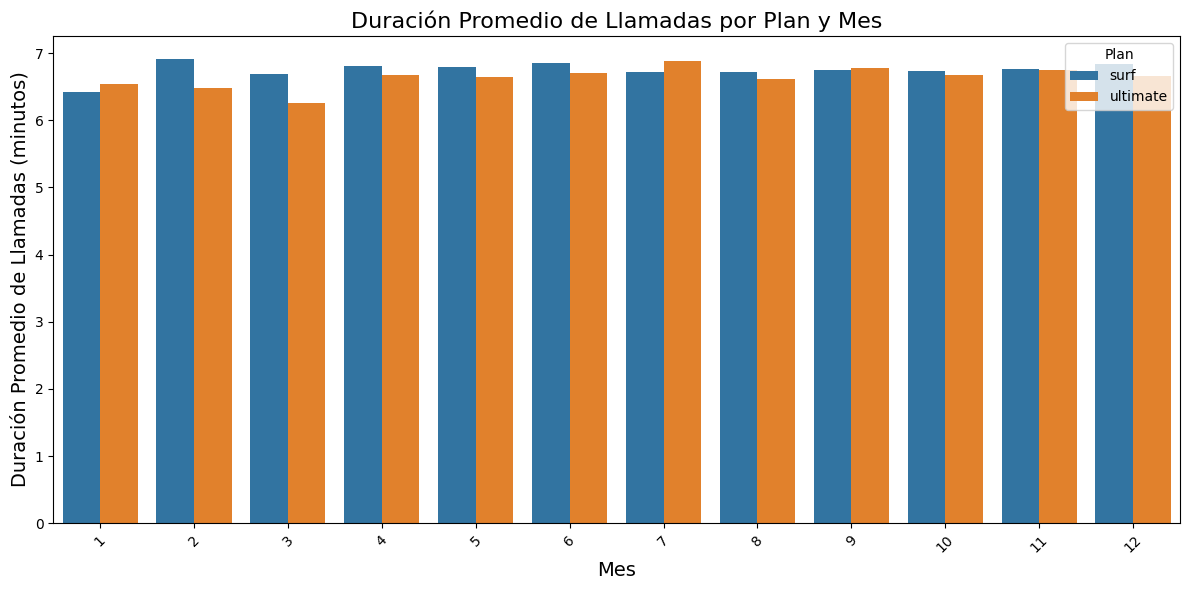

In [47]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Antes de eso, vamos a cambiar el tipo de dato de "user_id" en la tabla "calls"
calls['user_id'] = calls['user_id'].astype('string')

# Unir la columna 'plan' de megaline_final al DataFrame calls
calls_with_plan = pd.merge(calls, megaline_final[['user_id', 'plan']], on='user_id', how='left')

# Agrupar por plan y mes, y calcular la duración promedio
average_duration = calls_with_plan.groupby(['plan', 'call_date'])['duration'].mean().reset_index()


# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=average_duration, x='call_date', y='duration', hue='plan')

# Configurar el título y las etiquetas
plt.title('Duración Promedio de Llamadas por Plan y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Duración Promedio de Llamadas (minutos)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Plan')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

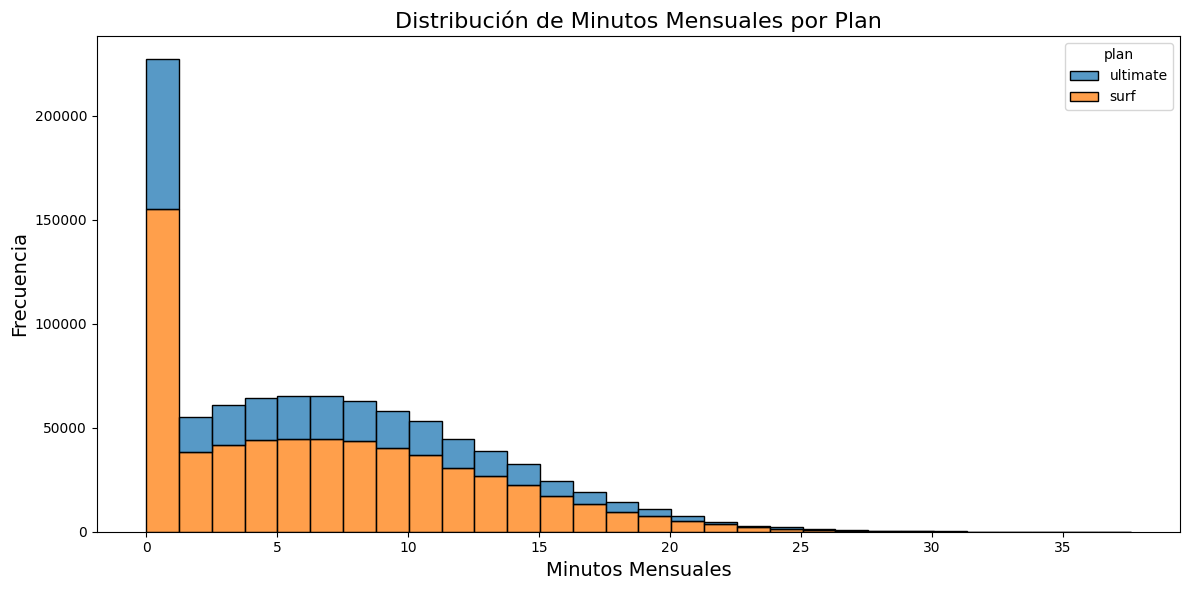

In [48]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Crear un histograma de minutos por plan
plt.figure(figsize=(12, 6))
sns.histplot(data=calls_with_plan, x='duration', hue='plan', multiple='stack', bins=30)

# Configurar el título y las etiquetas
plt.title('Distribución de Minutos Mensuales por Plan', fontsize=16)
plt.xlabel('Minutos Mensuales', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [49]:
# Calcula la media y la varianza de la duración mensual de llamadas por plan.

# monthly_stats = calls_with_plan.groupby('call_date')['duration'].agg(['mean', 'var']).reset_index()

# Renombrar las columnas para mayor claridad
# monthly_stats.rename(columns={'mean': 'mean_duration', 'var': 'variance_duration'}, inplace=True)

# Mostrar el resultado
# print(monthly_stats)

# Calcular la media y varianza de la duración mensual de llamadas por plan
monthly_stats_by_plan = (
    calls_with_plan
    .groupby(['plan', 'call_date'])['duration']
    .agg(['mean', 'var'])
    .reset_index()
)

# Renombrar las columnas para mayor claridad
monthly_stats_by_plan.rename(columns={'mean': 'mean_duration', 'var': 'variance_duration'}, inplace=True)

# Mostrar el resultado
print(monthly_stats_by_plan)

        plan  call_date  mean_duration  variance_duration
0       surf          1       6.428000          27.776751
1       surf          2       6.911475          35.262356
2       surf          3       6.687485          32.169516
3       surf          4       6.810010          33.557875
4       surf          5       6.785599          34.821516
5       surf          6       6.845905          35.013538
6       surf          7       6.721714          33.422015
7       surf          8       6.722522          34.068487
8       surf          9       6.744534          34.584597
9       surf         10       6.734858          33.778347
10      surf         11       6.767396          33.863949
11      surf         12       6.838787          34.482060
12  ultimate          1       6.541518          35.151894
13  ultimate          2       6.484405          33.633473
14  ultimate          3       6.259090          33.092357
15  ultimate          4       6.681232          31.955293
16  ultimate  

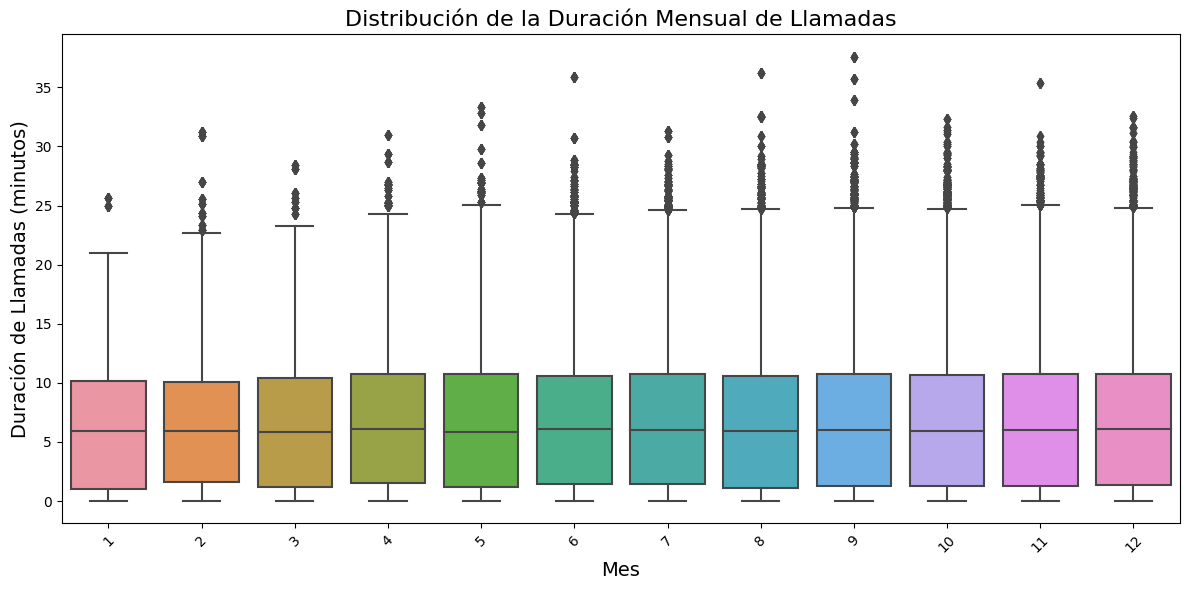

In [50]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(12, 6))
sns.boxplot(data=calls_with_plan, x='call_date', y='duration')

# Configurar el título y las etiquetas
plt.title('Distribución de la Duración Mensual de Llamadas', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Duración de Llamadas (minutos)', fontsize=14)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

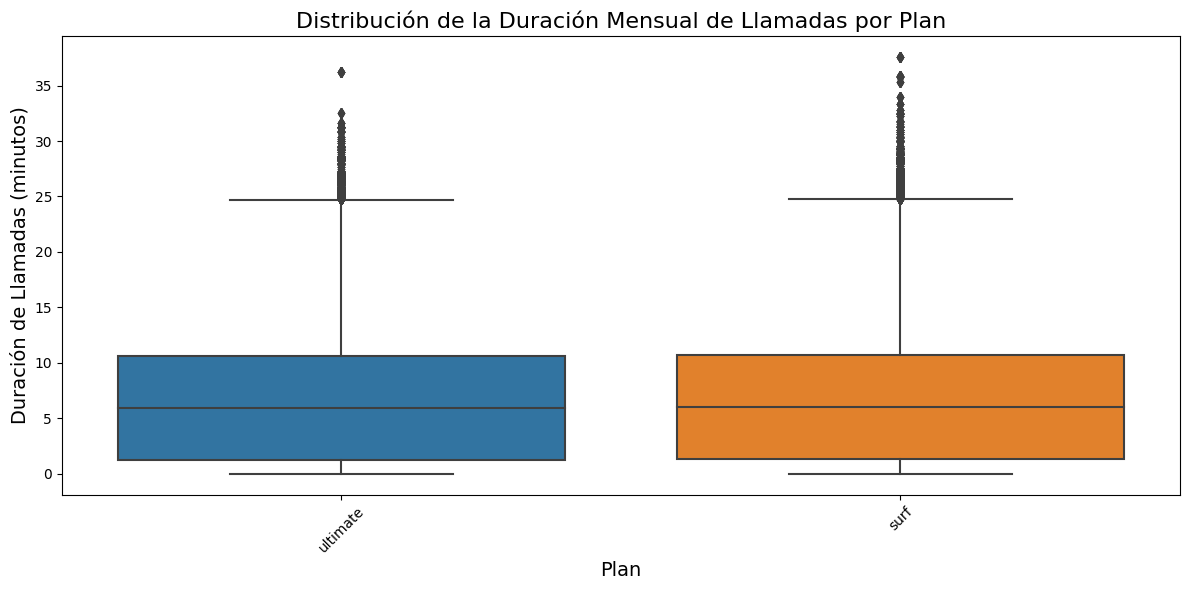

In [51]:
# Crear un diagrama de caja para visualizar la duración mensual de llamadas por plan
plt.figure(figsize=(12, 6))
sns.boxplot(data=calls_with_plan, x='plan', y='duration')

# Configurar el título y las etiquetas
plt.title('Distribución de la Duración Mensual de Llamadas por Plan', fontsize=16)
plt.xlabel('Plan', fontsize=14)
plt.ylabel('Duración de Llamadas (minutos)', fontsize=14)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

De las gráficas, sabemos que la duración promedio por llamadas por mes de ambos planes es relativamente la misma, rondando entre los 6 y 7 minutos de duración. A pesar de esto, se puede ver que en 9 de los 12 meses del 2018, las llamadas en el plan "surf" duraron más que las del plan "ultimate". Aunque es una variación mínima, podemos asumir que la duración de las llamadas en el plan "ultimate" es el menor. Por otro lado, viendo el histograma, podemos concluir que los minutos mensuales que necesitan los usuarios de cada plan tiene tendencia hacia la baja; es decir, entre el minuto 0 y 1 es donde más frecuencia hay. Si nos vamos alejando de este 0 la frecuencia va a ir disminuyendo considerablemente. Por último, en los histogramas podemos ver que aunque la duración de las llamdas ronda entre los 6 y 7 minutos, hay muchos valores atípicos que sobrepasan la barrera de los 20 minutos.

### Mensajes

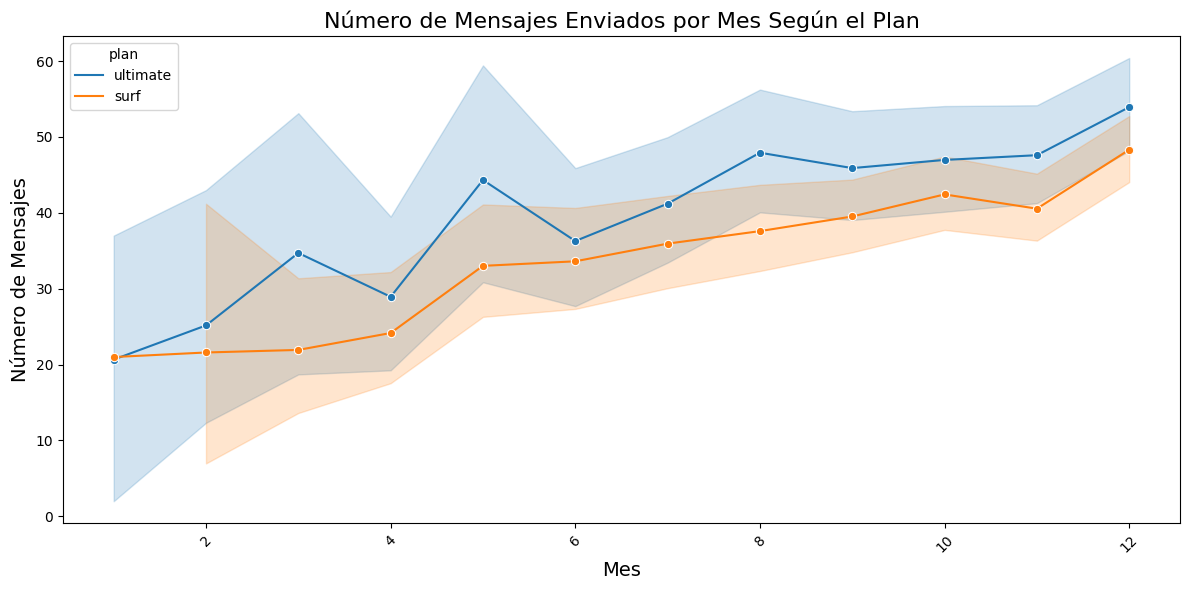

In [52]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
plt.figure(figsize=(12, 6))
sns.lineplot(data=megaline_final, x='month', y='num_messages', hue='plan', marker='o')

# Configurar el título y las etiquetas
plt.title('Número de Mensajes Enviados por Mes Según el Plan', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Número de Mensajes', fontsize=14)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


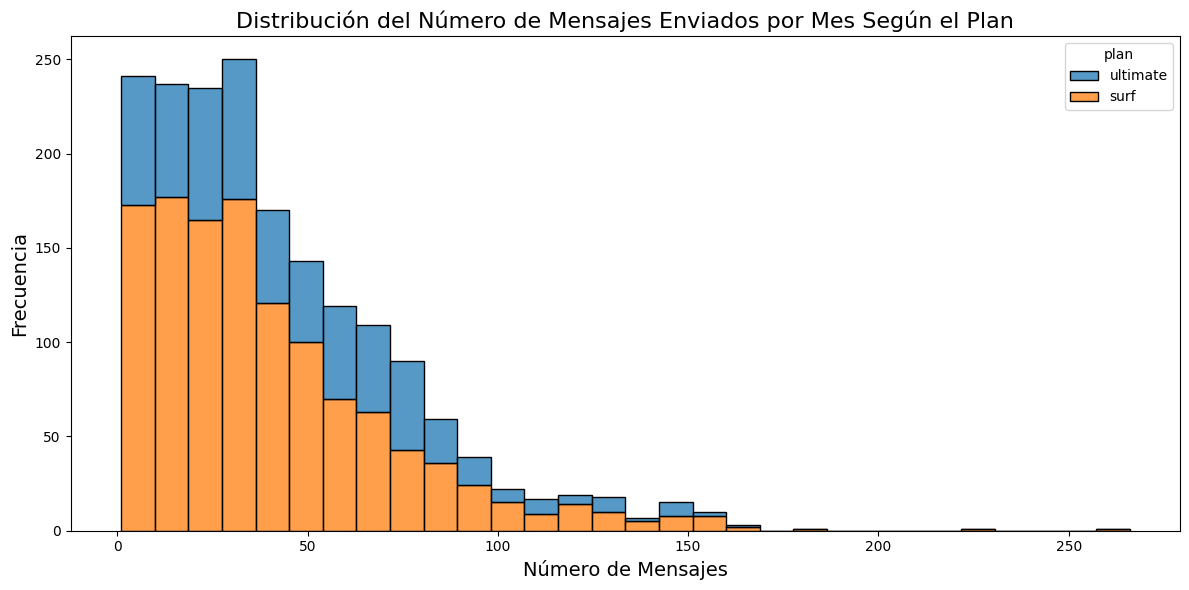

In [53]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Configuración del gráfico
plt.figure(figsize=(12, 6))

# Trazar el histograma
sns.histplot(data=megaline_final, x='num_messages', hue='plan', multiple='stack', bins=30, kde=False)

# Añadir título y etiquetas
plt.title('Distribución del Número de Mensajes Enviados por Mes Según el Plan', fontsize=16)
plt.xlabel('Número de Mensajes', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar gráfico
plt.tight_layout()
plt.show()

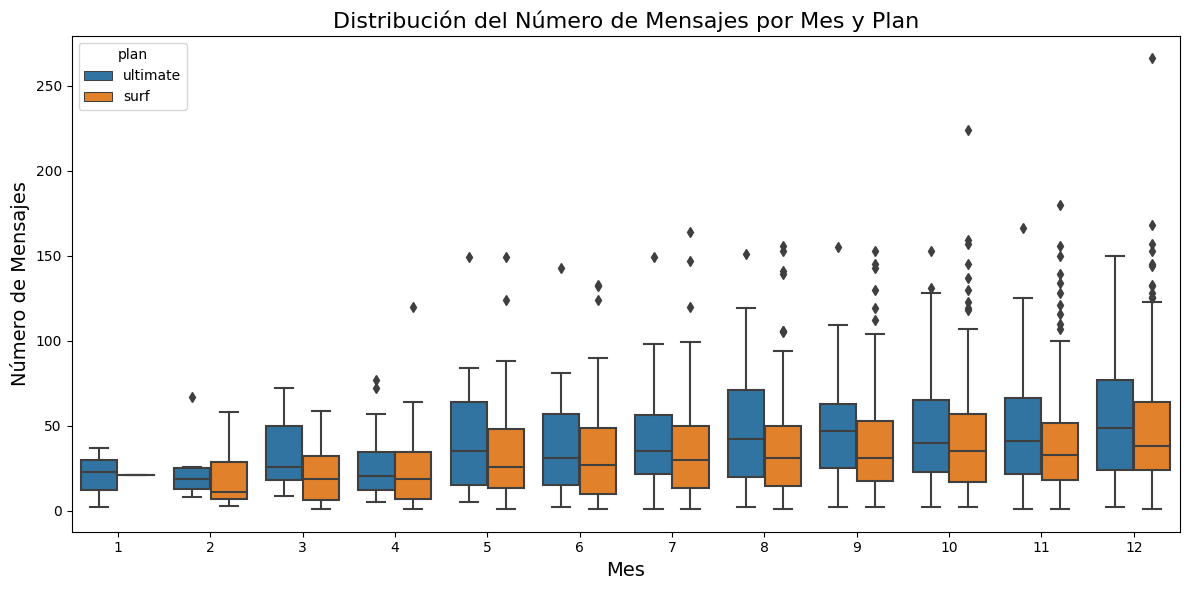

In [54]:
# Número de mensajes por plan y por mes (diagrama de caja)
plt.figure(figsize=(12, 6))
sns.boxplot(data=megaline_final, x='month', y='num_messages', hue='plan')

plt.title('Distribución del Número de Mensajes por Mes y Plan', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Número de Mensajes', fontsize=14)
plt.tight_layout()
plt.show()

De la gráfica de "Número de Mensajes Enviados por Mes Según el Plan", sabemos que los mensajes enviados por mes es mayor en el plan "Ultimate" que en el "Surf". Esto nos dice que los usuarios del plan "Ultimate" utilizan más los mensajes. Por otro lado, sabemos que la mayor parte de mensajes se concentran entre los 0 - 50 mensajes para ambos planes, mientras que la tendencia va a la baja después de los 50 mensajes. Esto nos dice que los usuarios utilizan 50 o menos mensajes al mes, mientras que la menor parte de los usuarios utilizan más de 50 mensajes al mes. Por último, confirmamos nuevamente que el número de mensajes ronda entre los 0 y 50 mensajes. Además, se observa que hay igual varios datos atípicos, principalmente en los últimos meses del año, lo que nos puede decir que hay cierta tendencia en esa época del año.

### Internet

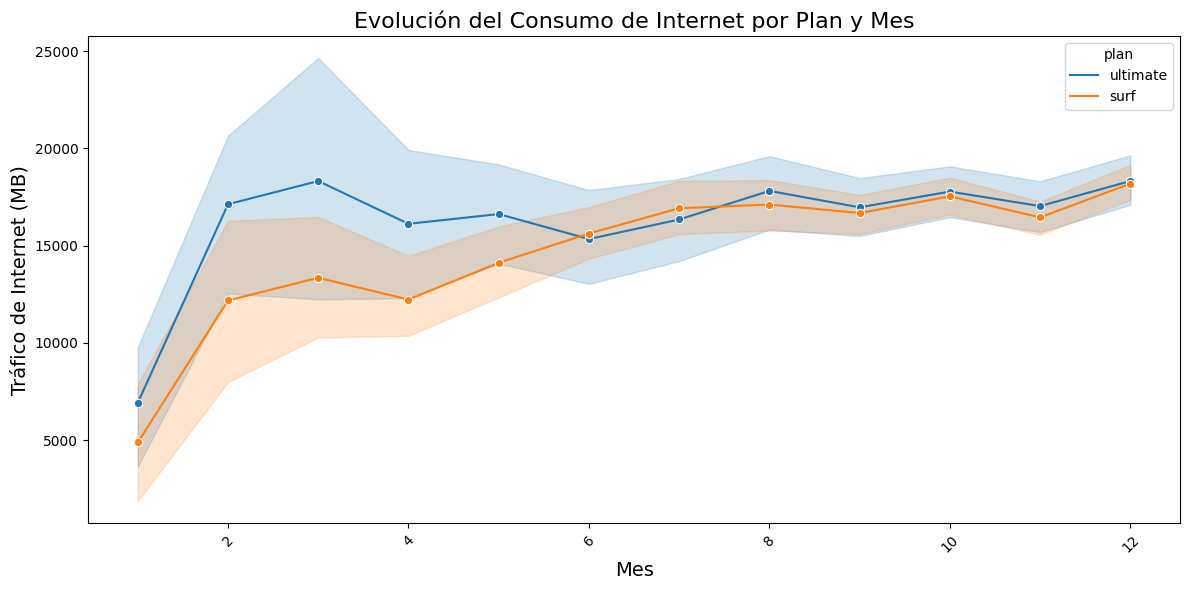

In [55]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

plt.figure(figsize=(12, 6))
sns.lineplot(data=megaline_final, x='month', y='mb_used', hue='plan', marker='o')

plt.title('Evolución del Consumo de Internet por Plan y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Tráfico de Internet (MB)', fontsize=14)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

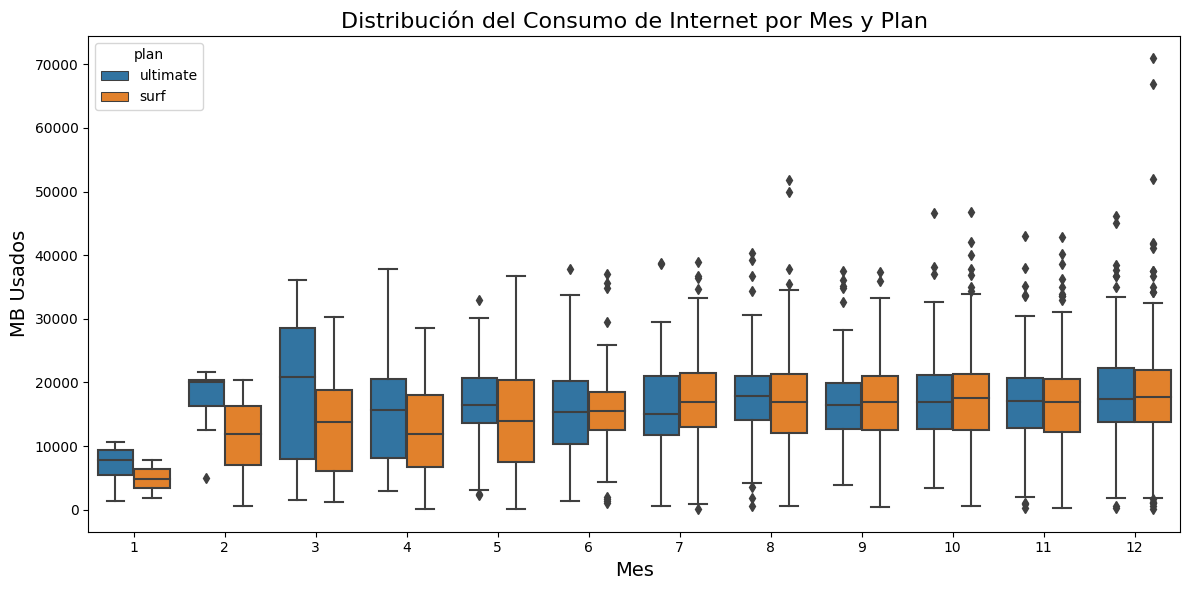

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=megaline_final, x='month', y='mb_used', hue='plan')

plt.title('Distribución del Consumo de Internet por Mes y Plan', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('MB Usados', fontsize=14)
plt.tight_layout()
plt.show()

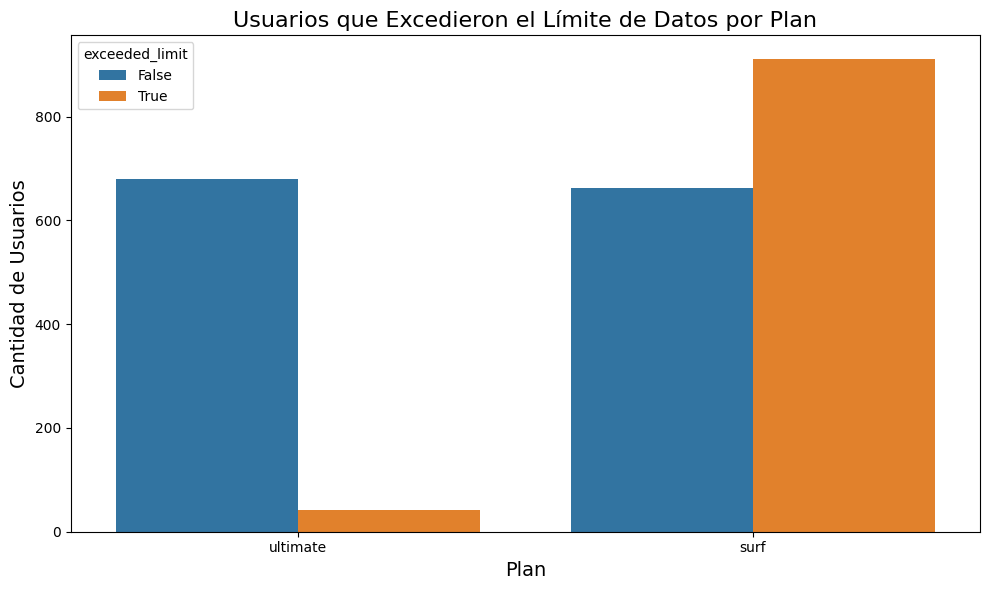

In [57]:
megaline_final['exceeded_limit'] = megaline_final['mb_used'] > megaline_final['mb_per_month_included']

plt.figure(figsize=(10, 6))
sns.countplot(data=megaline_final, x='plan', hue='exceeded_limit')

plt.title('Usuarios que Excedieron el Límite de Datos por Plan', fontsize=16)
plt.xlabel('Plan', fontsize=14)
plt.ylabel('Cantidad de Usuarios', fontsize=14)
plt.tight_layout()
plt.show()

De la gráfica de "Evolución del Consumo de Internet por Plan y Mes", sabemos que el mayor consumo de internet se presenta en el plan de "Ultimate", aunque en los meses de Junio y Julio el consumo mayor es del plan de "Surf". Viendo la gráfica de "Distribución del Consumo de Internet por Mes y Plan", observamos que el rango medio de consumo de mb es de entre 15,000 y 20,000. Igualmente observamos otra vez que en el segundo semestre del año, hay mayor cantidad de datos atípicos. Por último, en la gráfica de "Usuarios que Excedieron el Límite de Datos por Plan", me di a la tarea de identificar por plan la cantidad de usuarios que excedieron el límite de datos. En la gráfica, se observa que mientras en el plan "Ultimate" menos de 50 personas excediron el límite, en el plan "Surf" más de 800 personas excedieron su plan, por lo que a estos usuarios les podría convenir cambiar de plan al Ultimate.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [58]:
# Cálculo de las Estadísticas Descriptivas de los Ingresos por Plan

# Agrupamos por plan y calculamos las estadísticas descriptivas
ingresos_descriptivos = megaline_final.groupby('plan')['monthly_income'].agg(['mean', 'median', 'var', 'std', 'min', 'max', 'count'])

# Mostrar los resultados
print(ingresos_descriptivos)

               mean     median          var        std   min         max  \
plan                                                                       
surf      55.252172  35.268193  2592.886406  50.920393  20.0  564.971309   
ultimate  72.062930  70.000000   109.884303  10.482571  70.0  178.522764   

          count  
plan             
surf       1180  
ultimate    579  


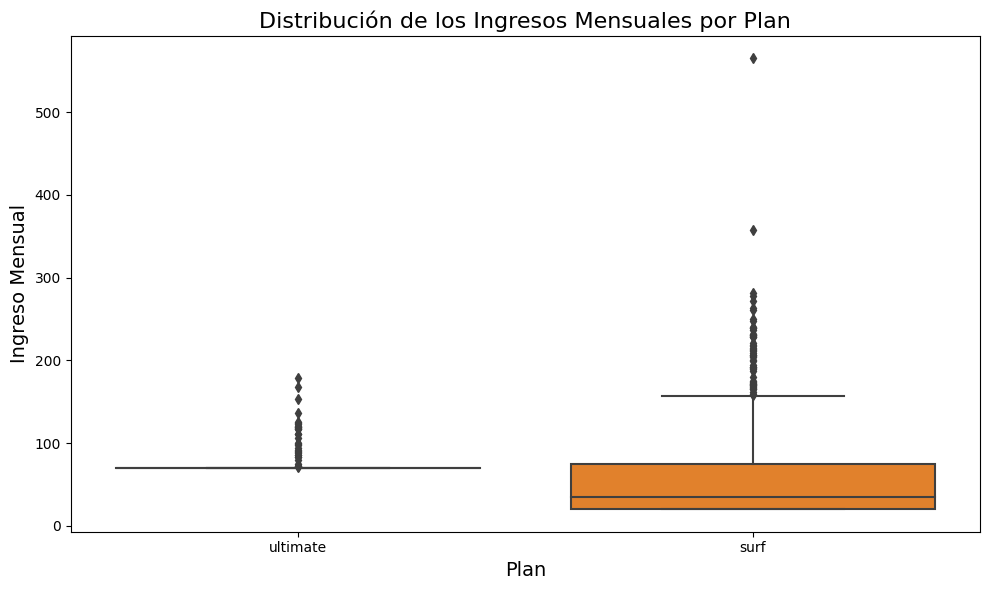

In [59]:
# Distribución de los Ingresos por Plan

plt.figure(figsize=(10, 6))

# Diagrama de caja para los ingresos por plan
sns.boxplot(data=megaline_final, x='plan', y='monthly_income')

plt.title('Distribución de los Ingresos Mensuales por Plan', fontsize=16)
plt.xlabel('Plan', fontsize=14)
plt.ylabel('Ingreso Mensual', fontsize=14)
plt.tight_layout()
plt.show()

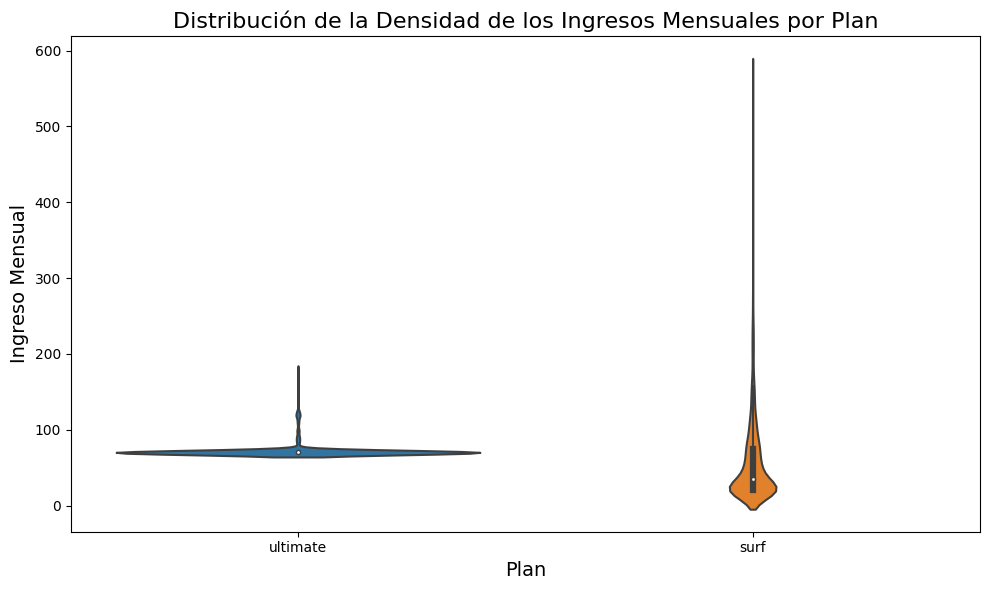

In [60]:
plt.figure(figsize=(10, 6))

# Gráfico de violín para los ingresos por plan
sns.violinplot(data=megaline_final, x='plan', y='monthly_income')

plt.title('Distribución de la Densidad de los Ingresos Mensuales por Plan', fontsize=16)
plt.xlabel('Plan', fontsize=14)
plt.ylabel('Ingreso Mensual', fontsize=14)
plt.tight_layout()
plt.show()

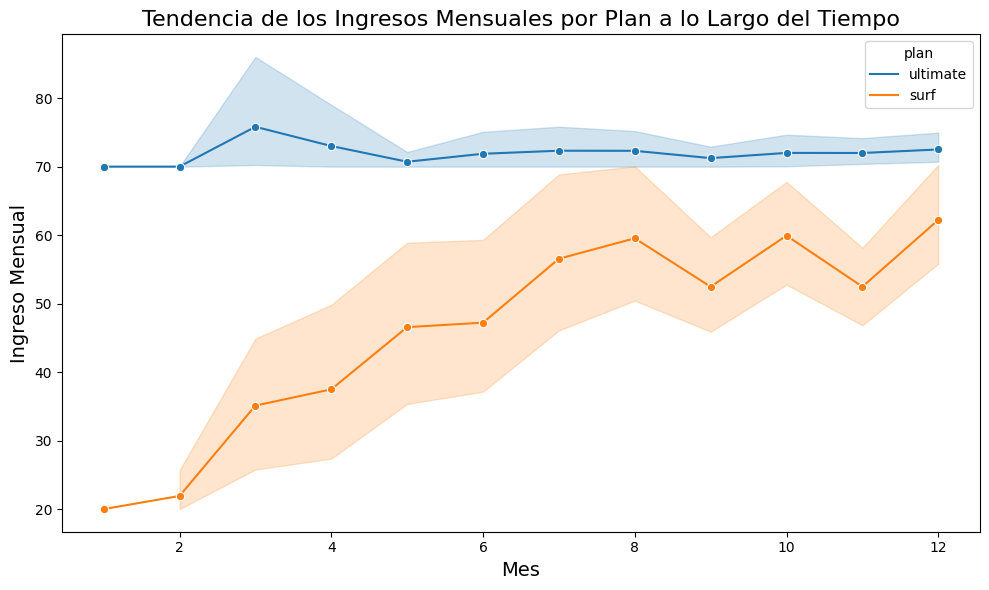

In [61]:
# Tendencia de Ingresos Mensuales a lo Largo del Tiempo por Plan

plt.figure(figsize=(10, 6))

# Trazamos la tendencia de los ingresos mensuales a lo largo de los meses para cada plan
sns.lineplot(data=megaline_final, x='month', y='monthly_income', hue='plan', marker='o')

plt.title('Tendencia de los Ingresos Mensuales por Plan a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Ingreso Mensual', fontsize=14)
plt.tight_layout()
plt.show()

Con base a los ingresos, podemos ver que la media del plan "Ultimate" es de $72, mientras que para el plan de "Surf" es menor y cercano a los $55. A pesar de que el precio es menor en el plan "surf" su desviación estándar sobrepasa los $50, mientras que para el plan "Ultimate" son solo $10. Este comportamiento lo podemos ver en el boxplot y en el gráfico de violin, donde el plan "Ultimate" tiene menos desviación y en el "Surf" tiene más. Por otro lado, podmeos ver que en el plan "Surf" existen más datos atípicos al mayor. Por último, en la última gráfica, podemos ver, en el plan "Ultimate", que los ingresos rondan muy aproxiamdos a los $70, mientras que para el plan "Surf", la variabilidad va desde los $20 a los $60. Esto nos dice que los usuarios del plan "Surf" deben adquirir aún más mensajes, llamadas e internet, lo que incrementa su gasto mensual.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [66]:
# Prueba las hipótesis

# Hipótesis Nula (H0) = No hay diferencia en los ingresos promedio entre los planes Ultimate y Surf.
# Hipótesis Alternativa (Ha) = Hay una diferencia en los ingresos promedio entre los planes Ultimate y Surf.

# Elección de la Prueba Estadística
# Dado que estamos comparando los promedios de dos grupos independientes, utilizaremos la prueba t de Student para dos muestras independientes. 
# Esta prueba es apropiada si los ingresos son aproximadamente normales y la varianza es similar entre los dos grupos.

# Determinación del Valor Alfa
# α=0.05

# Filtrar los datos para los planes Ultimate y Surf
ultimate_income = megaline_final[megaline_final['plan'] == 'ultimate']['monthly_income'].dropna()
surf_income = megaline_final[megaline_final['plan'] == 'surf']['monthly_income'].dropna()

alpha = 0.05

# Realizar la prueba t de Student
results = st.ttest_ind(ultimate_income, surf_income) # realizar una prueba

print('valor p:', results.pvalue) # tu código: imprime el valor p obtenido)

if results.pvalue < alpha:# tu código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 6.56601124721972e-15
Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [63]:
# Para hacer esta prueba de hipótesis, primero debemos sacar el estado del df "users"
users['state'] = users['city'].apply(lambda x: x.split(', ')[1].replace(' MSA', ''))

# Verificar el resultado
print(users[['city', 'state']].head())

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

                                    city state
0  Atlanta-Sandy Springs-Roswell, GA MSA    GA
1        Seattle-Tacoma-Bellevue, WA MSA    WA
2   Las Vegas-Henderson-Paradise, NV MSA    NV
3                          Tulsa, OK MSA    OK
4        Seattle-Tacoma-Bellevue, WA MSA    WA


In [64]:
# Luego unimos la columna 'state' al DataFrame 'megaline_final' usando 'user_id'
megaline_final = megaline_final.merge(users[['user_id', 'state']], on='user_id', how='left')

# Verificar el resultado
print(megaline_final.head())

  user_id  month  num_calls  minutes  num_messages   mb_used      plan  \
0    1000     12       16.0   116.83          11.0   1901.47  ultimate   
1    1001      8       27.0   171.14          30.0   6919.15      surf   
2    1001      9       49.0   297.69          44.0  13314.82      surf   
3    1001     10       65.0   374.11          53.0  22330.49      surf   
4    1001     11       64.0   404.59          36.0  18504.30      surf   

   messages_included  mb_per_month_included  minutes_included  ...  \
0               1000                  30720              3000  ...   
1                 50                  15360               500  ...   
2                 50                  15360               500  ...   
3                 50                  15360               500  ...   
4                 50                  15360               500  ...   

   usd_per_gb  usd_per_message  usd_per_minute  excess_messages  \
0           7             0.01            0.01              0.0   


In [67]:
# Prueba las hipótesis

# Hipótesis Nula (H0) = No hay diferencia en el ingreso promedio de los usuarios del área NY-NJ en comparación con los usuarios de otras regiones.
# Hipótesis Alternativa (Ha) = Hay una diferencia en el ingreso promedio de los usuarios del área NY-NJ en comparación con los usuarios de otras regiones.

# Elección de la Prueba Estadística
# Dado que estamos comparando los promedios de dos grupos independientes, utilizaremos la prueba t de Student para dos muestras independientes. 
# Esta prueba es apropiada si los ingresos son aproximadamente normales y la varianza es similar entre los dos grupos.

# Determinación del Valor Alfa
# α=0.05

# Filtrar los ingresos de NY-NJ y de otras regiones
ny_nj_income = megaline_final[megaline_final['state'].str.contains('NY-NJ-PA')]['monthly_income'].dropna()
other_income = megaline_final[~megaline_final['state'].str.contains('NY-NJ-PA')]['monthly_income'].dropna()


alpha = 0.05

# Realizar la prueba t de Student
results = st.ttest_ind(ultimate_income, surf_income) # realizar una prueba

print('valor p:', results.pvalue) # tu código: imprime el valor p obtenido

if results.pvalue < alpha:# tu código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 6.56601124721972e-15
Rechazamos la hipótesis nula


## Conclusión general

A lo largo de este proyecto, hemos realizado un análisis exhaustivo de los datos provenientes de cinco tablas diferentes, asegurándonos de corregir errores y mejorar la calidad de los datos antes de la fusión. La comprensión de las tarifas y el modelo de cobro fue crucial, ya que nos permitió visualizar claramente las condiciones de cada plan de suscripción. Mediante el cálculo de estadísticas descriptivas y la elaboración de gráficos, pudimos obtener una visión general de los ingresos y el comportamiento de los usuarios según su plan. Además, al aplicar pruebas de hipótesis, evaluamos si existen diferencias significativas en los ingresos entre usuarios de diferentes regiones y planes, lo que nos proporcionó información valiosa para determinar la rentabilidad de cada tarifa. En conclusión, este análisis no solo resalta la importancia de limpiar y preparar los datos, sino que también enfatiza cómo las decisiones basadas en evidencias pueden guiar las estrategias comerciales y optimizar la oferta de servicios.
En términos generales podemos ver, gracias a las gráficas, que el plan "Surf" es el mejor debido a que genera más ingresos para la empresa, debido a que los usuarios deben pagar extra porque se sobre pasan por ejemplo en sus datos utilizados.